In [1]:
# Importamos librerias requeridas para el EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import ast

In [2]:
games_df = pd.read_csv('new_games.csv')
reviews_df = pd.read_csv('new_review.csv')
archivos_partes = ['items_parte_1.csv', 'items_parte_2.csv']

# Crear una lista de DataFrames, uno por cada parte
partes = [pd.read_csv(archivo) for archivo in archivos_partes]

# Concatenar los DataFrames en uno solo
items_df = pd.concat(partes, ignore_index=True)

In [3]:
games_df.columns

Index(['publisher', 'genres', 'app_name', 'title', 'release_date', 'tags',
       'discount_price', 'specs', 'price', 'early_access', 'id', 'metascore',
       'developer'],
      dtype='object')

In [4]:
print(games_df.shape)
games_df.head()

(32132, 13)


,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,id,metascore,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,['Single-player'],4.99,False,761140,NaN,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",0.00,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,NaN,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",0.00,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290,NaN,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017-12-07,"['Action', 'Adventure', 'Casual']",0.83,['Single-player'],0.99,False,767400,NaN,彼岸领域
4,NaN,NaN,Log Challenge,NaN,NaN,"['Action', 'Indie', 'Casual', 'Sports']",1.79,"['Single-player', 'Full controller support', '...",2.99,False,773570,NaN,NaN


In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32132 entries, 0 to 32131
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24072 non-null  object 
 1   genres          28850 non-null  object 
 2   app_name        32132 non-null  object 
 3   title           30084 non-null  object 
 4   release_date    30066 non-null  object 
 5   tags            31970 non-null  object 
 6   discount_price  32132 non-null  float64
 7   specs           31463 non-null  object 
 8   price           32132 non-null  float64
 9   early_access    32132 non-null  bool   
 10  id              32132 non-null  int64  
 11  metascore       2606 non-null   float64
 12  developer       28835 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 3.0+ MB


In [6]:
games_df.describe()

,discount_price,price,id,metascore
count,32132.000000,32132.000000,3.213200e+04,2606.000000
mean,0.083075,8.897085,4.517616e+05,72.248273
std,1.765234,15.987388,1.827153e+05,10.829376
min,0.000000,0.000000,1.000000e+01,20.000000
25%,0.000000,2.990000,3.293025e+05,66.000000
50%,0.000000,4.990000,4.520700e+05,74.000000
75%,0.000000,9.990000,5.934025e+05,80.000000
max,139.990000,995.000000,2.028850e+06,96.000000


In [7]:
tipo_texto = games_df.select_dtypes(include=["object"]).columns
data_texto = games_df[tipo_texto]
data_texto.describe()

,publisher,genres,app_name,title,release_date,tags,specs,developer
count,24072,28850,32132,30084,30066,31970,31463,28835
unique,8237,883,32094,30054,3582,15395,4649,10992
top,Ubisoft,['Action'],Soundtrack,Soundtrack,2012-10-16,"['Casual', 'Simulation']",['Single-player'],Ubisoft - San Francisco
freq,385,1880,3,3,100,1292,2794,1259


In [8]:
games_df.isnull().sum()

publisher          8060
genres             3282
app_name              0
title              2048
release_date       2066
tags                162
discount_price        0
specs               669
price                 0
early_access          0
id                    0
metascore         29526
developer          3297
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_6320\1834798823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = games_df.corr()


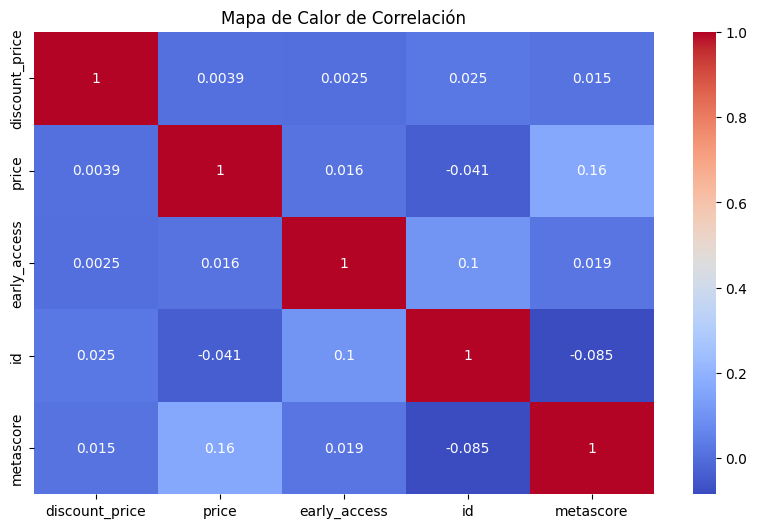

In [9]:
#Gráfico de Correlación:
correlation_matrix = games_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

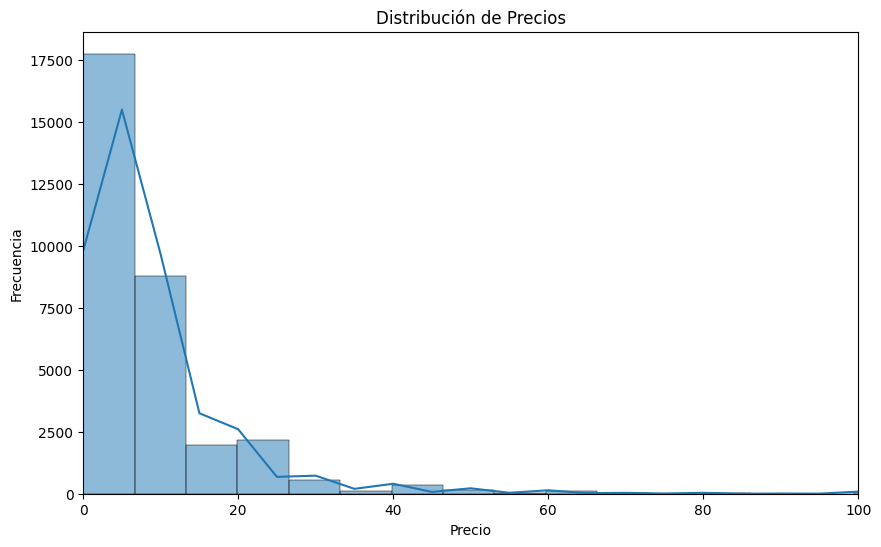

In [10]:
# Visualizar la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(games_df['price'], bins=150, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')

# Ajustar límites del eje x para mostrar el rango deseado
plt.xlim(0, 100)  # Ajusta los valores de límite según tu preferencia

plt.show()

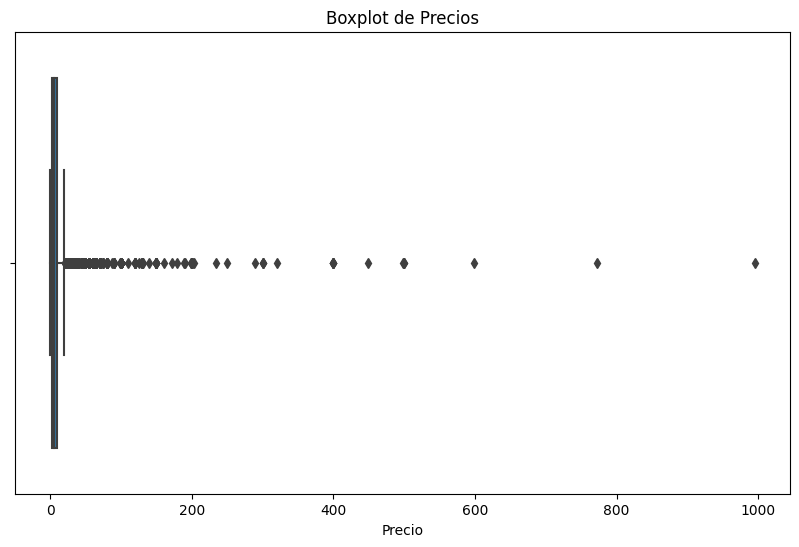

In [11]:
# Identificar outliers en el precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=games_df)
plt.xlabel('Precio')
plt.title('Boxplot de Precios')
plt.show()

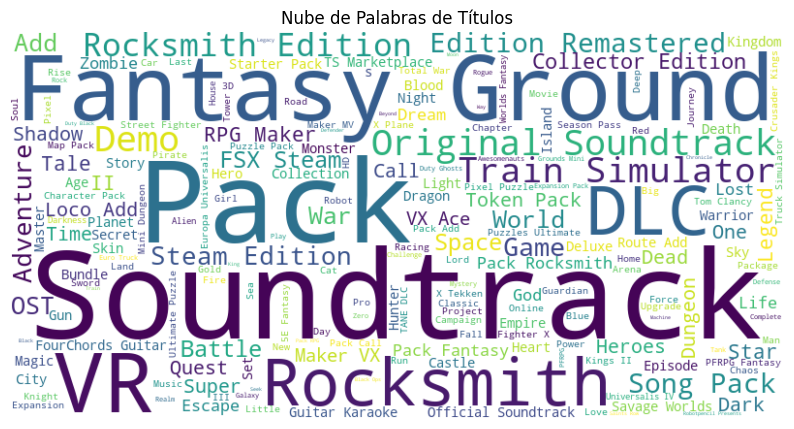

In [14]:
# Nube de palabras de los títulos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(games_df['app_name']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

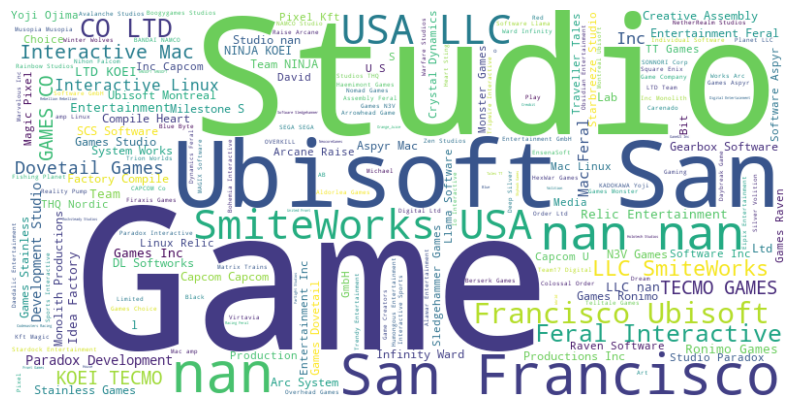

In [17]:
# Nube de palabras de los desarrolladores
developer_strings = games_df['developer'].astype(str).str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(developer_strings)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

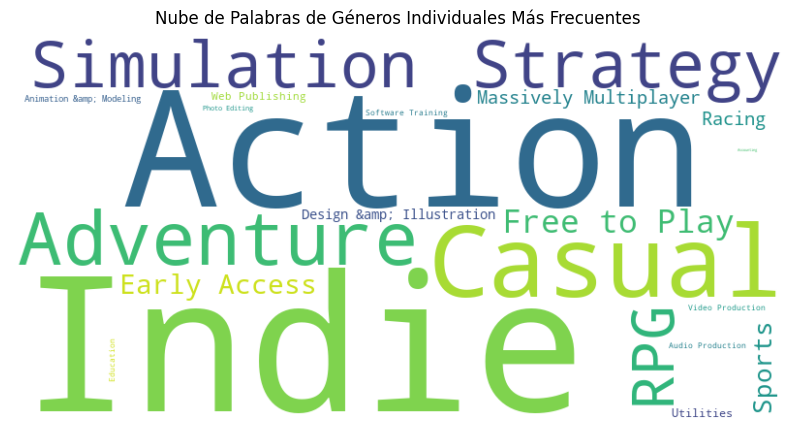

In [19]:
games_df['genres'].fillna('[]', inplace=True)  
# Convertir las cadenas en listas de géneros
games_df['genres_list'] = games_df['genres'].apply(ast.literal_eval)

# Crear una lista plana de géneros individuales
all_genres = [genre for genres_list in games_df['genres_list'] for genre in genres_list]

# Contar la frecuencia de cada género
genre_counts = Counter(all_genres)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Géneros Individuales Más Frecuentes')
plt.show()

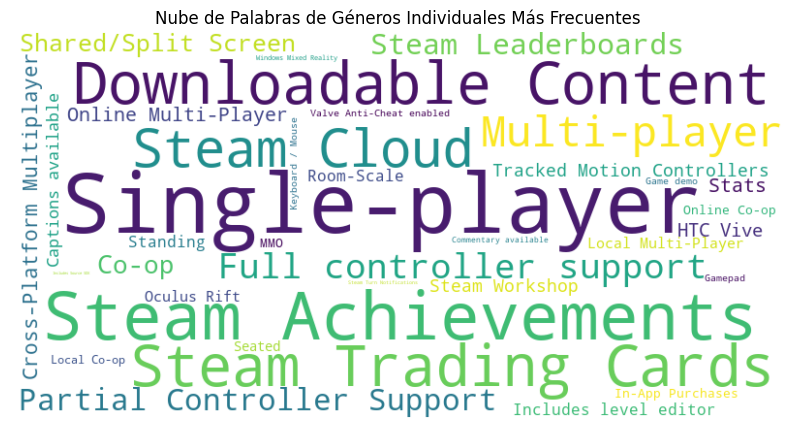

In [21]:
games_df['specs'].fillna('[]', inplace=True)  
# Convertir las cadenas en listas de géneros
games_df['specs_list'] = games_df['specs'].apply(ast.literal_eval)

# Crear una lista plana de géneros individuales
all_genres = [genre for genres_list in games_df['specs_list'] for genre in genres_list]

# Contar la frecuencia de cada género
genre_counts = Counter(all_genres)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Géneros Individuales Más Frecuentes')
plt.show()

In [22]:
reviews_df.columns

Index(['user_id', 'item_id', 'recommend', 'sentiment_analysis', 'posted'], dtype='object')

In [23]:
print(reviews_df.shape)
reviews_df.head()

(59278, 5)


,user_id,item_id,recommend,sentiment_analysis,posted
0,76561197970982479,1250.0,True,2.0,2011-11-05
1,76561197970982479,22200.0,True,2.0,2011-07-15
2,76561197970982479,43110.0,True,2.0,2011-04-21
3,js41637,251610.0,True,2.0,2014-06-24
4,js41637,227300.0,True,2.0,2013-09-08


In [24]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59278 entries, 0 to 59277
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             59278 non-null  object 
 1   item_id             59278 non-null  float64
 2   recommend           59278 non-null  bool   
 3   sentiment_analysis  59278 non-null  float64
 4   posted              59278 non-null  object 
dtypes: bool(1), float64(2), object(2)
memory usage: 1.9+ MB


In [25]:
reviews_df.describe()

,item_id,sentiment_analysis
count,59278.000000,59278.000000
mean,169914.304683,1.468825
std,132018.438102,0.757125
min,10.000000,0.000000
25%,8930.000000,1.000000
50%,218230.000000,2.000000
75%,261685.000000,2.000000
max,527340.000000,2.000000


In [26]:
tipo_texto = reviews_df.select_dtypes(include=["object"]).columns
data_texto = reviews_df[tipo_texto]
data_texto.describe()

,user_id,posted
count,59278,59278
unique,25449,1906
top,Letachal,2014-06-21
freq,20,225


In [27]:
reviews_df.isnull().sum()

user_id               0
item_id               0
recommend             0
sentiment_analysis    0
posted                0
dtype: int64

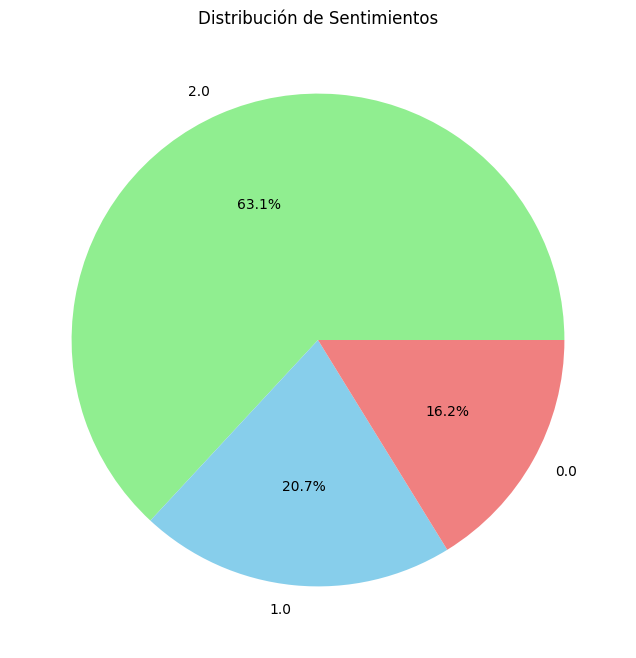

In [29]:
#Gráfico de Pastel
plt.figure(figsize=(8, 8))
reviews_df['sentiment_analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'lightcoral'])
plt.title('Distribución de Sentimientos')
plt.ylabel('')
plt.show()

In [30]:
items_df.columns

Index(['user_id', 'items_count', 'item_id', 'item_name', 'playtime_forever',
       'user_url'],
      dtype='object')

In [31]:
print(items_df.shape)
items_df.head()

(2061286, 6)


,user_id,items_count,item_id,item_name,playtime_forever,user_url
0,76561197970982479,277,10,Counter-Strike,6,http://steamcommunity.com/profiles/76561197970...
1,76561197970982479,277,20,Team Fortress Classic,0,http://steamcommunity.com/profiles/76561197970...
2,76561197970982479,277,30,Day of Defeat,7,http://steamcommunity.com/profiles/76561197970...
3,76561197970982479,277,40,Deathmatch Classic,0,http://steamcommunity.com/profiles/76561197970...
4,76561197970982479,277,50,Half-Life: Opposing Force,0,http://steamcommunity.com/profiles/76561197970...


In [32]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061286 entries, 0 to 2061285
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
 5   user_url          object
dtypes: int64(3), object(3)
memory usage: 94.4+ MB


In [33]:
items_df.describe()

,items_count,item_id,playtime_forever
count,2.061286e+06,2.061286e+06,2.061286e+06
mean,3.056256e+02,1.809649e+05,1.026110e+03
std,8.187793e+02,1.305898e+05,5.497460e+03
min,1.000000e+00,1.000000e+01,0.000000e+00
25%,5.700000e+01,3.572000e+04,0.000000e+00
50%,1.140000e+02,2.161500e+05,3.800000e+01
75%,2.280000e+02,2.679800e+05,3.740000e+02
max,7.762000e+03,5.307200e+05,6.427730e+05


In [36]:
tipo_texto = items_df.select_dtypes(include=["object"]).columns
data_texto = items_df[tipo_texto]
data_texto.describe()

,user_id,item_name,user_url
count,2061286,2061286,2061286
unique,39220,10247,39220
top,phrostb,Dota 2 Test,http://steamcommunity.com/id/phrostb
freq,7762,25991,7762


In [35]:
items_df.isnull().sum()

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
user_url            0
dtype: int64

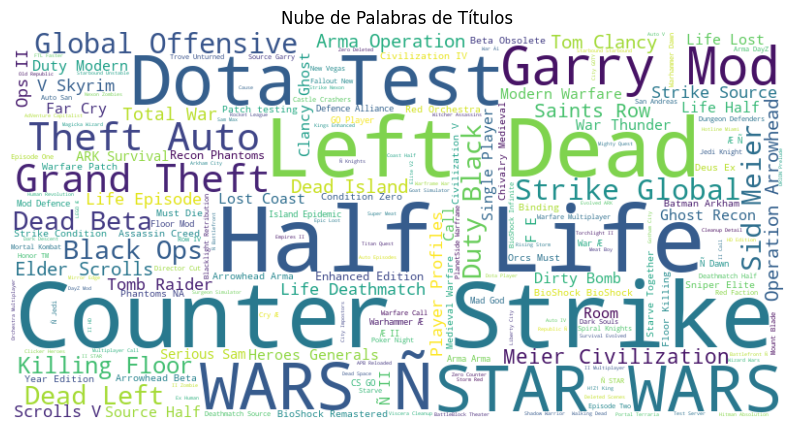

In [37]:
# Nube de palabras de los títulos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(items_df['item_name']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()